$$
\begin{cases}
\frac{\partial u}{\partial t} + (t+6) \frac{\partial u}{\partial x} = 0, \; 0<t \leq 1, \; 
0 < x \leq 1\\
u(x, 0) = x, \; \; u(0, t) = -0.5t^2 - 6t
\end{cases}
$$

Разностная схема:

$$
\begin{cases}
u_l^{n+1} = u_l^n + (\frac{\tau_n}{2}+t^n+6)\frac{\tau_n}{2h}(-u_{l-2}^n+4u_{l-1}^n-3u_l^n)
+ \frac{(t^n + 6)^2\tau_n^2}{2h^2}(u_{l-2}^n-2u_{l-1}^n+u_l^n), \\
l = \overline{2, L}, \;
n = \overline{0, N-1} \\
u_l^0 =x_l, \; l = \overline{0, L}, \; u_0^n=-0.5(t^n)^2 -6t^n, \; n = \overline{1, N} \\
u_{1}^n = ? , \; n = \overline{1, N}.
\end{cases}
$$

Аналитическое решение:

$$
u(x,t) = x - \frac{t^2}{2}-6t
$$

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

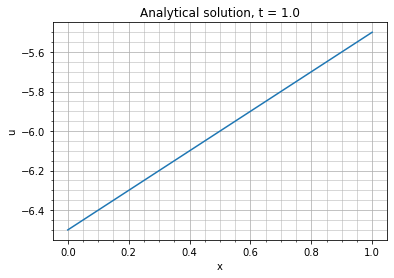

,0,1,2,3,4,5,6,7,8,9,10
x,0.00000E+00,1.00000E-01,2.00000E-01,3.00000E-01,4.00000E-01,5.00000E-01,6.00000E-01,7.00000E-01,8.00000E-01,9.00000E-01,1.00000E+00
y,-6.50000E+00,-6.40000E+00,-6.30000E+00,-6.20000E+00,-6.10000E+00,-6.00000E+00,-5.90000E+00,-5.80000E+00,-5.70000E+00,-5.60000E+00,-5.50000E+00


In [15]:
fig, ax = plt.subplots()

x = np.linspace(0, 1, 11)
t = 1

u_a = x - t**2/2 - 6*t

plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('u')
ax.set_xlabel('x')
plt.title('Analytical solution, t = 1.0')
plt.plot(x, u_a)
plt.show()

pd.options.display.float_format = '{:.5E}'.format
df =pd.DataFrame({"x": x, "y": u_a})
df.T

Дополнительное условие:

Из аппроксимации внутренних точек получаем, что:
$$
\Vert \delta f^{(h)} \Vert \leq O(\tau^2)+ O(h^2)
$$
Тогда
$$
u_1^n = -\frac{(t_n)^2}{2}-6t^n+h
$$

In [26]:
def analyt(x,t):
    return  x - t**2/2 - 6*t

In [27]:
def U_analyt(N, L, x, t):   
    t_a = []
    for i in range(N+1):
        for j in range(L+1):
            t_a.append(t[i])
    t_a = np.array(t_a)

    x_a = np.array([])
    for i in range(N+1):
        x_a = np.concatenate((x_a,x))

    U_an = np.vectorize(analyt)(x_a,t_a).reshape((N+1,L+1))   

    return U_an

In [58]:
def U_num(L, N, t, x):

    h = 1 / L
    tau = 1 / N

    U = [[0 for i in range(L+1)] for j in range(N+1)]

    for l in range(L+1):
        U[0][l] = x[l]
    
    for n in range(1, N+1):
        U[n][0] = -0,5*t[n]**2 - 6*t[n]
        U[n][1] = -t[n]**2/2-6*t[n]+h
    
    for n in range(N):
        for l in range(2,L+1):
            U[n+1][l] = U[n][l] - tau/(2*h)*(tau/2 + t[n] + 6)*(4*U[n][l-1] - 1*U[n][l-2] - 3*U[n][l]) + (tau**2 * (t[n]+6)**2)/(2*h**2)*(U[n][l-2] -2*U[n][l-1] + U[n][l])
    
    return U

In [59]:
def graph(L, N):
    x = np.arange(0,1+1/(100*L),1/L)
    t = np.arange(0,1+1/(100*N),1/N)
    u_calcul = U_num(L, N, t)
    u_analytic = U_analyt(N, L, x, t)

    plt.figure(figsize=(12,12))
    plt.scatter(x, u_analytic, color='red',  label= 'График аналитического решения')
    plt.plot(x, u_analytic, color='red')
    plt.scatter(x, u_calcul, color='blue', label= 'Численное решение')
    plt.plot(x, u_calcul, color='blue')
    plt.ylabel('u(x)')
    plt.xlabel('x')
    plt.legend()
    plt.grid()
    plt.show()

In [60]:
L = 10
N = 10
graph(L, N)

TypeError: U_num() missing 1 required positional argument: 'x'

TypeError: U_num() missing 2 required positional arguments: 't' and 'x'

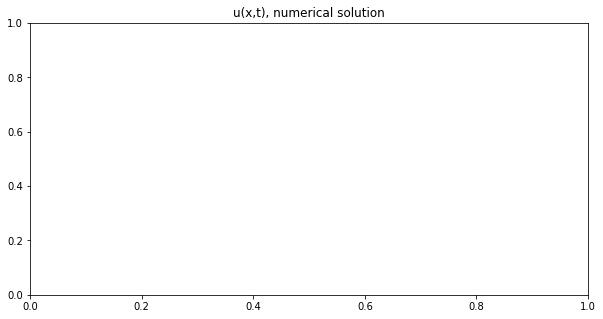

In [61]:
# NUMERICAL SOLUTION PLOT

Figure = plt.figure()
Figure.set_figwidth(10)
Figure.set_figheight(5)
plt.title('u(x,t), numerical solution')
plt.imshow(U_num(1000, 1000))